# Importing Dataset of Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Checking Null values in Dataset

In [5]:
#np.nan, None, NaN, others(formats in which null values are present)
# if other null values are present we will fill this with numpy (np.nan), as we are working with arrays

In [6]:
#similarly df.isnull().sum().sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

since there are no null values we can proceed

# Dataframe Description

The dataset contains the data of the customer. On the basis of the data we have to predict the total charges by the customer. 
The dataset contains the data like'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService',
'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'

In the above dataset the target is to predict the "Total Charges" paid by the customer. 

Churn rate (sometimes called attrition rate). 

In [8]:
a=12
type(a)

int

In [9]:
b="12"
type(b)

str

In [10]:
#figure in rupees
price='200'
#type(price)

In [11]:
f=int(price)
type(f)

int

# Checking the data types of the columns

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

object is a categorical data, int is numerical(64/32) and float is decimal(64/32)

We can observe that Totalcharges has continues data but it is an object type. Let us handle this column first

In [13]:
# to displaye the unique numbers
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
#to disolay the total number of unique numbers
df['TotalCharges'].nunique()

6531

In [15]:
df.shape

(7043, 21)

In [16]:
#to display only rows
df.shape[0]

7043

In [17]:
#there are spaces in Total charges, we see the spaces on target variable
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


after some observations, we saw the some columns have space as the value

# These spaces are not null values, but will fill these spaces with null values and handle accordingly. If these are less in number we will drop

In [18]:
# finding the number of white spaces
df.loc[df['TotalCharges']==" "].shape

(11, 21)

# Will get the erroe no relavent data is present whenever white spaces are there in dataset

We found that we have (11,12) white spaces we will replace these with nan values

In [19]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

as we have replace the white spaces with null values now will check the null values to confirm these spaces have been replced with null

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
#similarly
df.isnull().sum().sum()

11

# converting the column type from object to float, as other most of the columns are float

In [22]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [23]:
df['TotalCharges'].dtype

dtype('float64')

In [24]:
#silimarly
df.TotalCharges.dtype

dtype('float64')

# Now we can see that total charges has some null values, we will handle the null values as we have convert the data from object to float

Handling the null values and replacing it with mean of the columns. Mean, because the columns are contineous on nature

In [25]:
#finding the mean of target column
np.mean(df['TotalCharges'])

2283.3004408418697

In [26]:
#randomly checking to see of null vallues are present in total charges
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

Obervation, we can see that total charges has null value

In [27]:
#FILLING the null vaues with mean of the target column

df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [28]:
#checking randomly if null values have been replaces 
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges         2283.300441
Churn                         No
Name: 6670, dtype: object

Observations, we can see that the total charges have been replaced by mean value

In [29]:
#checking after replacing the null values with mean

df.isnull().sum().sum()

0

observations, null values have been replace with mean and null is showing 0

In [30]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Making Dataframe for the Nominal Data

In [31]:
#assigning or copying all the columns with string date into variable to Visualize

df_visualization_nominal=df[['gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']].copy()

In [32]:
df_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Visualization of Data

for the nominal categorical data we will use countplots as it will give the frequency of the classes of the columns

In [33]:
import seaborn as sns

Male      3555
Female    3488
Name: gender, dtype: int64


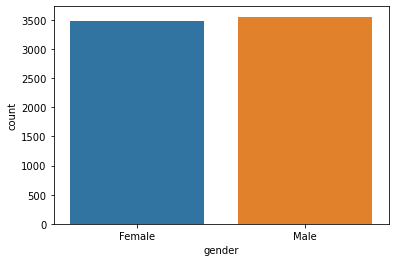

In [34]:
ax = sns.countplot(x="gender", data= df_visualization_nominal)
print(df_visualization_nominal["gender"].value_counts())

The count of Male is high compare to female 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


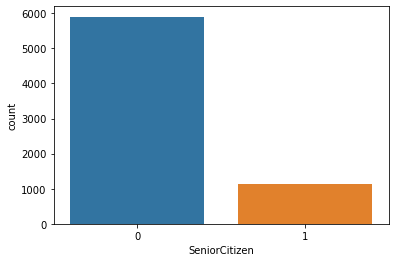

In [35]:
ax = sns.countplot(x="SeniorCitizen", data= df_visualization_nominal)
print(df_visualization_nominal["SeniorCitizen"].value_counts())

from the above observation total number of male is3555 and female is 3488

No     3641
Yes    3402
Name: Partner, dtype: int64


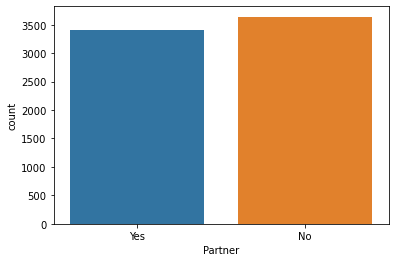

In [36]:
ax = sns.countplot(x="Partner", data= df_visualization_nominal)
print(df_visualization_nominal["Partner"].value_counts())

From the plot we can obeserve that the count is high without partner compare with having partner

No     4933
Yes    2110
Name: Dependents, dtype: int64


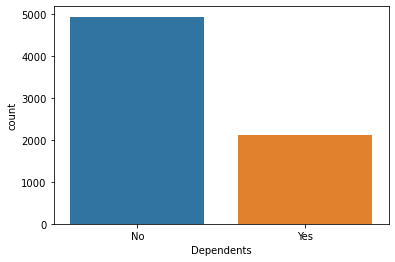

In [37]:
ax = sns.countplot(x="Dependents", data= df_visualization_nominal)
print(df_visualization_nominal["Dependents"].value_counts())

From the plot the count of no dependent is high compare to the count with dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64


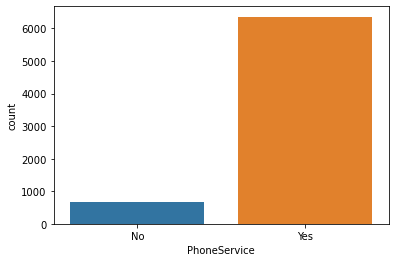

In [38]:
ax = sns.countplot(x="PhoneService", data= df_visualization_nominal)
print(df_visualization_nominal["PhoneService"].value_counts())

The count of people taken Phoneservices is more compare followed by people with no phoneservices 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


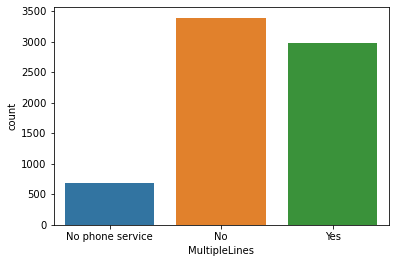

In [39]:
ax = sns.countplot(x="MultipleLines", data= df_visualization_nominal)
print(df_visualization_nominal["MultipleLines"].value_counts())

The count is high with no Multiplelines followed by others

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


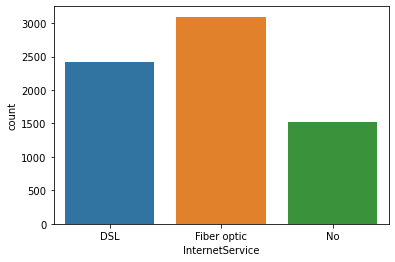

In [40]:
ax = sns.countplot(x="InternetService", data= df_visualization_nominal)
print(df_visualization_nominal["InternetService"].value_counts())

The count is high with Fiber optic services followed by others

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


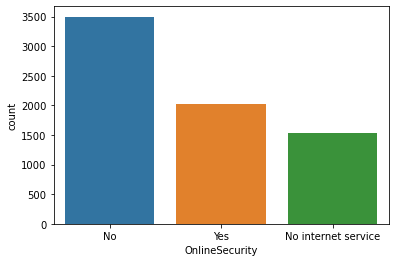

In [41]:
ax = sns.countplot(x="OnlineSecurity", data= df_visualization_nominal)
print(df_visualization_nominal["OnlineSecurity"].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


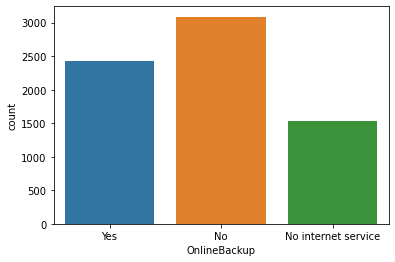

In [42]:
ax = sns.countplot(x="OnlineBackup", data= df_visualization_nominal)
print(df_visualization_nominal["OnlineBackup"].value_counts())

The count is high for no onlinebackup followed by others

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


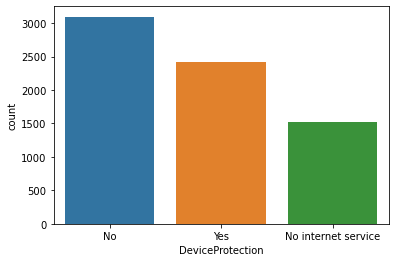

In [43]:
ax = sns.countplot(x="DeviceProtection", data= df_visualization_nominal)
print(df_visualization_nominal["DeviceProtection"].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


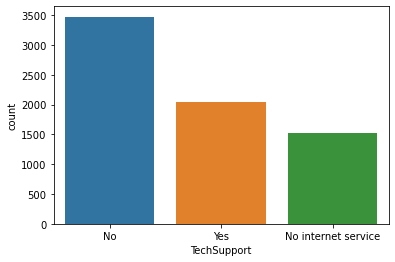

In [44]:
ax = sns.countplot(x="TechSupport", data= df_visualization_nominal)
print(df_visualization_nominal["TechSupport"].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


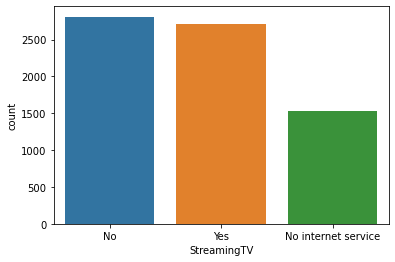

In [45]:
ax = sns.countplot(x="StreamingTV", data= df_visualization_nominal)
print(df_visualization_nominal["StreamingTV"].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


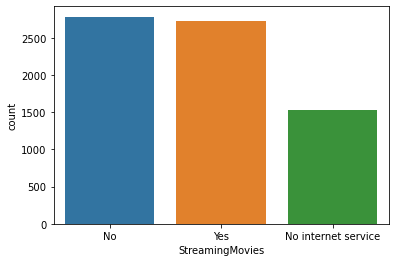

In [46]:
ax = sns.countplot(x="StreamingMovies", data= df_visualization_nominal)
print(df_visualization_nominal["StreamingMovies"].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


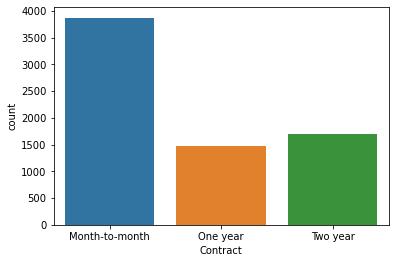

In [47]:
ax = sns.countplot(x="Contract", data= df_visualization_nominal)
print(df_visualization_nominal["Contract"].value_counts())

The count is high for month to month paying customers followed by others

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


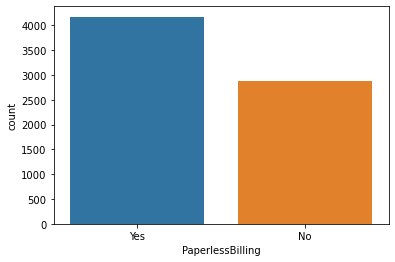

In [48]:
ax = sns.countplot(x="PaperlessBilling", data= df_visualization_nominal)
print(df_visualization_nominal["PaperlessBilling"].value_counts())

The count is high for paperlessbilling customers followed by others

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


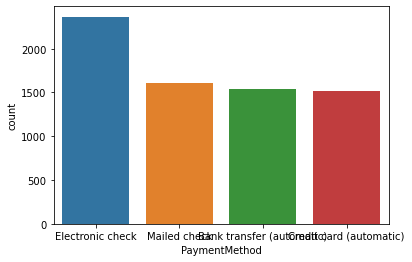

In [114]:
ax = sns.countplot(x="PaymentMethod", data= df_visualization_nominal)
print(df_visualization_nominal["PaymentMethod"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


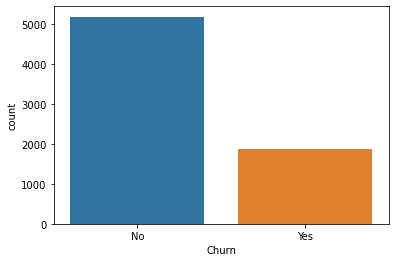

In [50]:
ax = sns.countplot(x="Churn", data= df_visualization_nominal)
print(df_visualization_nominal["Churn"].value_counts())

# Making DataFrame of the Ordinal Data

In [51]:
#we have two ordinal data in dataframe

df_visualization_ordinal=df[["customerID", "tenure"]].copy()

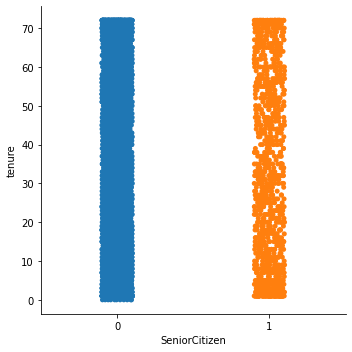

In [52]:
sns.catplot(x="SeniorCitizen", y="tenure", data=df)

# Checking the distribution of the continuous value of the float type columns

In [53]:
df_visualization_continuous=df[["MonthlyCharges", "TotalCharges"]].copy()

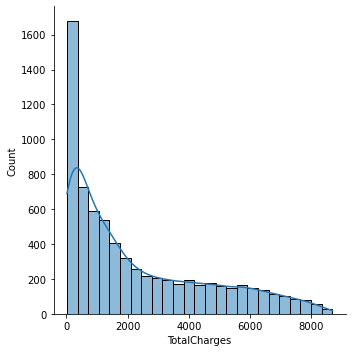

In [54]:
import seaborn as sns
sns.displot(df_visualization_continuous["TotalCharges"], kde=True)

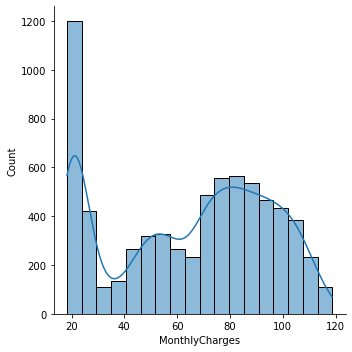

In [55]:
sns.displot(df_visualization_continuous["MonthlyCharges"], kde=True)

Visualization is completed

# Encoding DataFrame

In [56]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [57]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [58]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


Hence all the columns are converted into integers

# Describe the dataset

In [59]:
#only continuous columns

df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

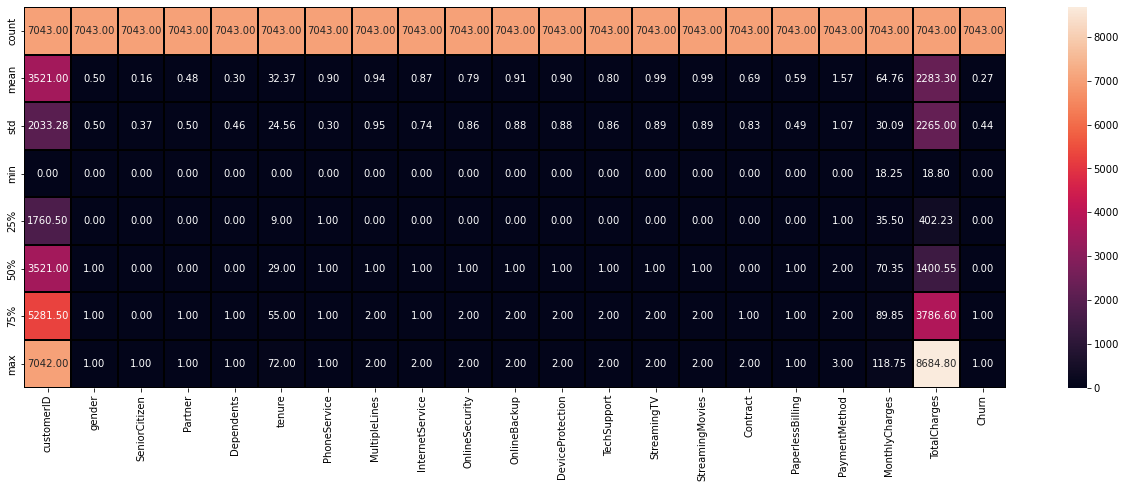

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidths=0.1, linecolor="black", fmt="0.2f")

# Correlation of the columns with the target columns


In [61]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


In [62]:
df.corr()["TotalCharges"].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

Gender is giving the lowest relationship hence it is nothing to do with subscription of the customer

Also, the negative values tell us that, if the negative values increases than the values in total charges decreases.

viseversa for positive corrrelation values

<AxesSubplot:>

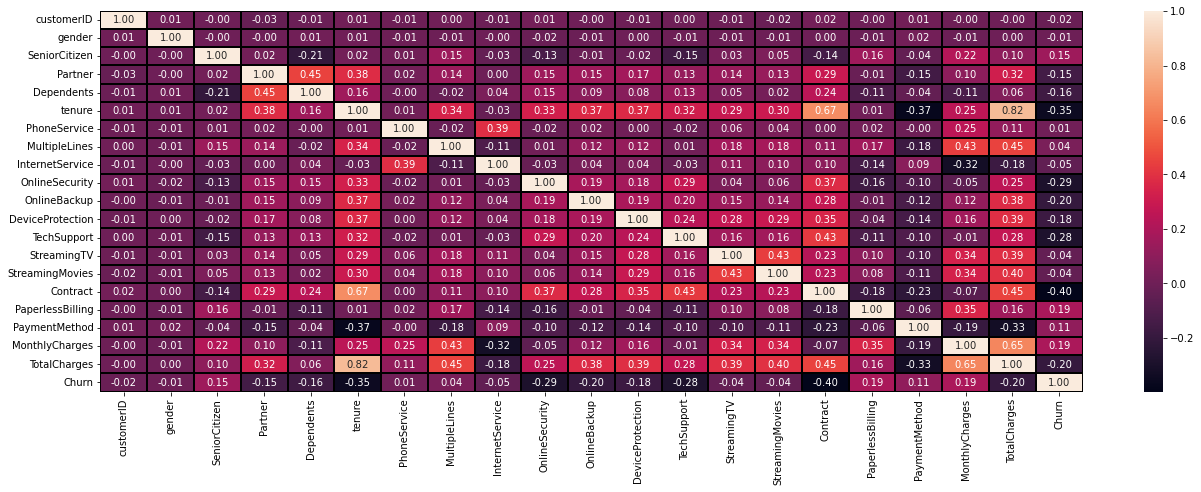

In [63]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor="black", fmt="0.2f")

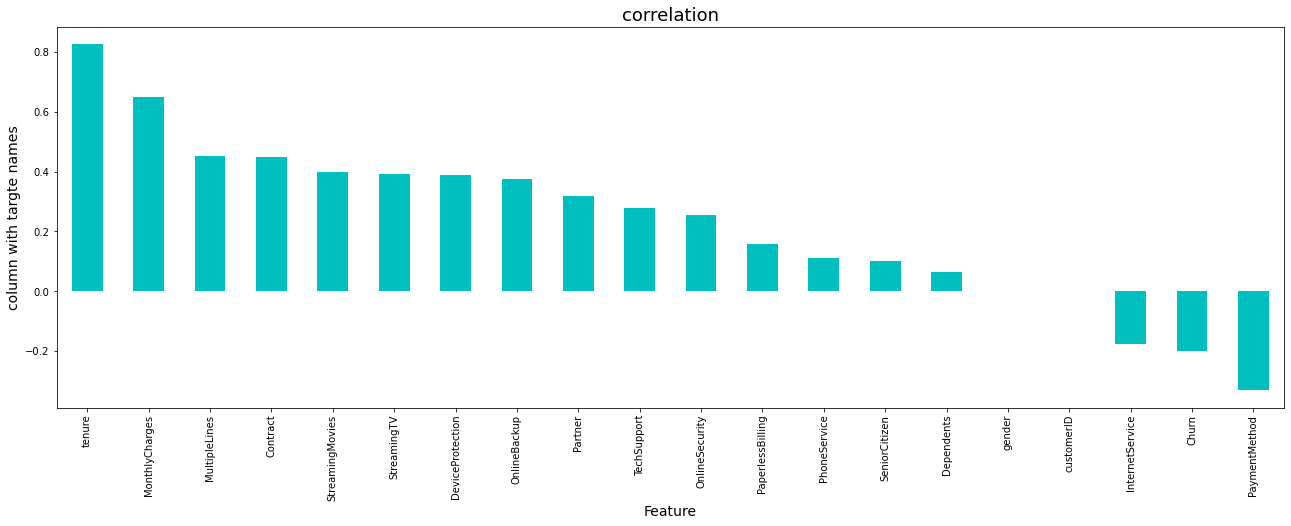

In [64]:
plt.figure(figsize=(22,7))
df.corr()["TotalCharges"].sort_values(ascending =False).drop(["TotalCharges"]).plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with targte names', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

Highest correlation we have for tenure, like was so on, longer the person using the product total charges will be more

# Checking the SKewness of the data

In [65]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

since no column has skewness in categorical data as we dnt remove the skewness in target column, we should not so any changes in the targte variable. hence we will not treat skewness that, 

# Checking the Outliers

In [66]:
#first check the datatypes
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

checking the outliers on int and float type of columns

<AxesSubplot:>

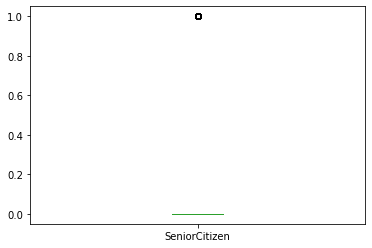

In [67]:
df["SeniorCitizen"].plot.box()

<AxesSubplot:>

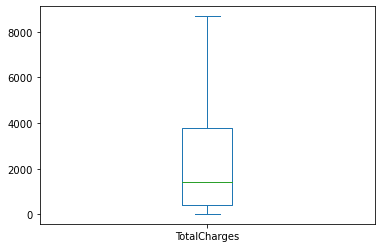

In [68]:
df["TotalCharges"].plot.box()

<AxesSubplot:>

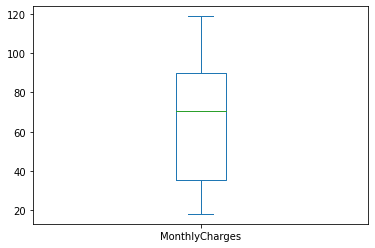

In [69]:
df["MonthlyCharges"].plot.box()

<AxesSubplot:>

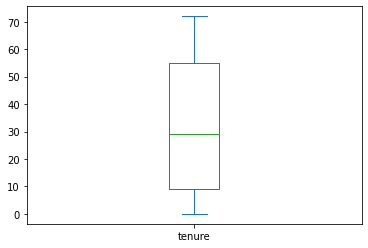

In [70]:
df["tenure"].plot.box()

<AxesSubplot:>

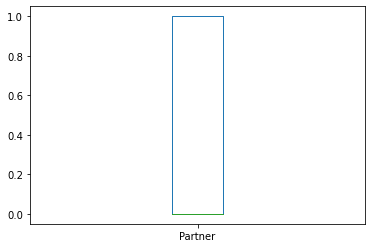

In [71]:
df["Partner"].plot.box()

<AxesSubplot:>

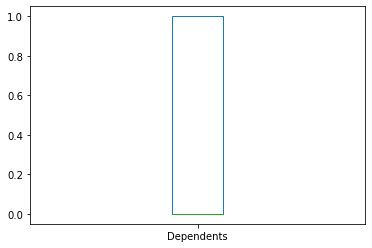

In [72]:
df["Dependents"].plot.box()

<AxesSubplot:>

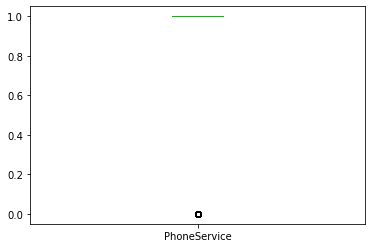

In [73]:
df["PhoneService"].plot.box()

<AxesSubplot:>

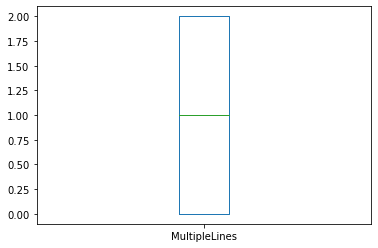

In [74]:
df["MultipleLines"].plot.box()

<AxesSubplot:>

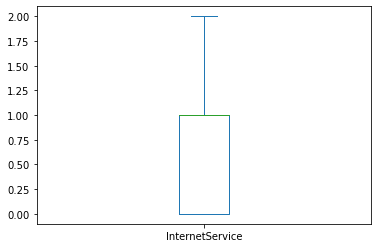

In [75]:
df["InternetService"].plot.box()

<AxesSubplot:>

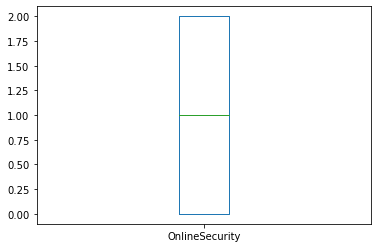

In [76]:
df["OnlineSecurity"].plot.box()

<AxesSubplot:>

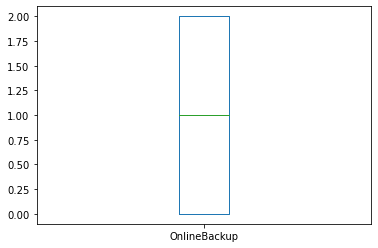

In [77]:
df["OnlineBackup"].plot.box()

<AxesSubplot:>

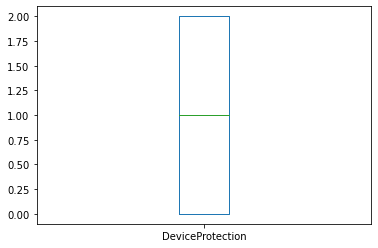

In [78]:
df["DeviceProtection"].plot.box()

<AxesSubplot:>

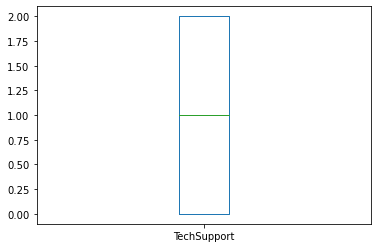

In [79]:
df["TechSupport"].plot.box()

<AxesSubplot:>

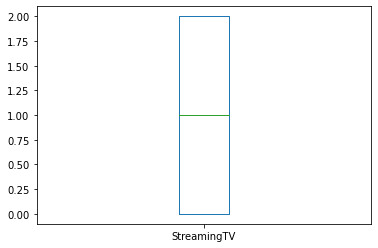

In [80]:
df["StreamingTV"].plot.box()

<AxesSubplot:>

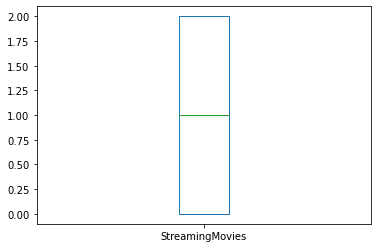

In [81]:
df["StreamingMovies"].plot.box()

<AxesSubplot:>

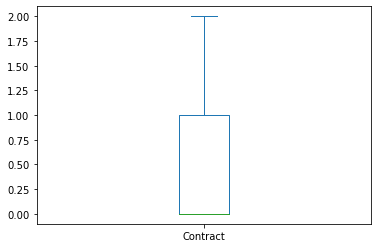

In [82]:
df["Contract"].plot.box()

<AxesSubplot:>

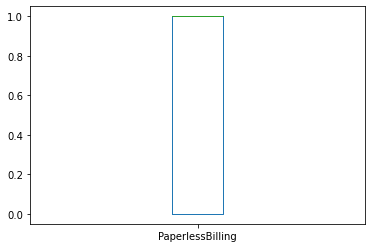

In [83]:
df["PaperlessBilling"].plot.box()

<AxesSubplot:>

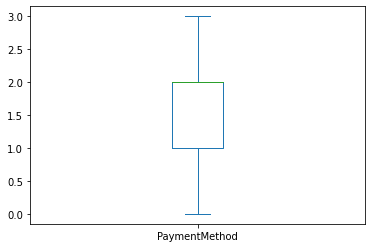

In [84]:
df["PaymentMethod"].plot.box()

<AxesSubplot:>

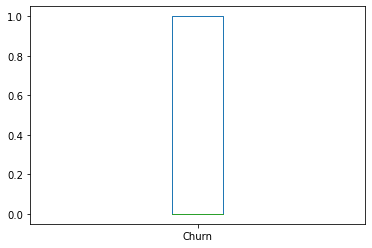

In [85]:
df["Churn"].plot.box()

since the column senior citizen is nominal type we cannot consider its data point as outlier. 
Only monthly column can have the outlier, but here it doesn't have it

# Considering the outlier removal

In [86]:
df.shape

(7043, 21)

In [87]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [88]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [89]:
df_new_z.shape

(6361, 21)

In [90]:
Data_loss=(7043-6361)/7043*100

In [91]:
Data_loss

9.683373562402386

Our data is becoming biased as it is not considering the case of senior citizens.(as it is affordatble dataloss we are
not losing very high amount of information, we will proceed ahead by old data not the new.
Thus we will not remove the outliers

****Most of the columns are categorical in nature and zscore is purely aplicable on continues datatype. Hence this is the 
major reason why we are not removing the skewness and outliers****. 


# seperating the columns into features and target

In [92]:
features=df.drop("TotalCharges", axis =1)
target=df["TotalCharges"]

In [93]:
df["TotalCharges"].value_counts

<bound method IndexOpsMixin.value_counts of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

# Scaling the data using Min-Max Scaler:

In [94]:
from sklearn.preprocessing import MinMaxScaler 
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=(0.2), random_state=i)
    lr.fit(features_train, target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training accuracy is :- {r2_score(target_train, pred_train)}")
    print(f"At random state {i}, the testing accuracy is :- {r2_score (target_test, pred_test)}")
    print("\n")
    

At random state 0, the training accuracy is :- 0.9058706722803965
At random state 0, the testing accuracy is :- 0.8977317673785853


At random state 1, the training accuracy is :- 0.9052277082152647
At random state 1, the testing accuracy is :- 0.9003132716690803


At random state 2, the training accuracy is :- 0.9056858398935237
At random state 2, the testing accuracy is :- 0.8984735750686543


At random state 3, the training accuracy is :- 0.9044956724241889
At random state 3, the testing accuracy is :- 0.9032713403489679


At random state 4, the training accuracy is :- 0.9031354749784841
At random state 4, the testing accuracy is :- 0.9085937883962479


At random state 5, the training accuracy is :- 0.9026338340566922
At random state 5, the testing accuracy is :- 0.9101290251842342


At random state 6, the training accuracy is :- 0.9028087364691222
At random state 6, the testing accuracy is :- 0.9097783155230829


At random state 7, the training accuracy is :- 0.9030731852162728
At 

as we are taking range 100, will get 100 randomstate

In [111]:
#in random state 12 training and testing accuracy are nearly equal
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=(0.2), random_state=12)

In [98]:
#train the model

lr.fit(features_train, target_train)

LinearRegression()

In [99]:
pred_test=lr.predict(features_test)

In [100]:
print(r2_score(target_test,pred_test))

0.9042173834952026


# Cross Validation of the Model:

It gives the true accuracy score of our dataset

In [101]:
Train_accuracy=r2_score(target_train, pred_train)
Test_accuracy=r2_score(target_test, pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9033382537767014 and accuracy score for training is -0.8911218980191142 and accuracy score for testing is 0.9042173834952026


At cross fold 3 the cv score is 0.9037012261875313 and accuracy score for training is -0.8911218980191142 and accuracy score for testing is 0.9042173834952026


At cross fold 4 the cv score is 0.9037044584134895 and accuracy score for training is -0.8911218980191142 and accuracy score for testing is 0.9042173834952026


At cross fold 5 the cv score is 0.9036665825623267 and accuracy score for training is -0.8911218980191142 and accuracy score for testing is 0.9042173834952026


At cross fold 6 the cv score is 0.903734902438936 and accuracy score for training is -0.8911218980191142 and accuracy score for testing is 0.9042173834952026


At cross fold 7 the cv score is 0.9035677539347997 and accuracy score for training is -0.8911218980191142 and accuracy score for testing is 0.9042173834952026


At cross fold 8 the cv score is 0.9

Here we are getting equal accuaracy for cross validation training and testing we can select cv=5 by default.
If we are not initiating any values of cv then it is by default cv=5

Here we have handled the problem of overfitting and underfitting by checking the training and testing score

# After traning model will plot the best fit line

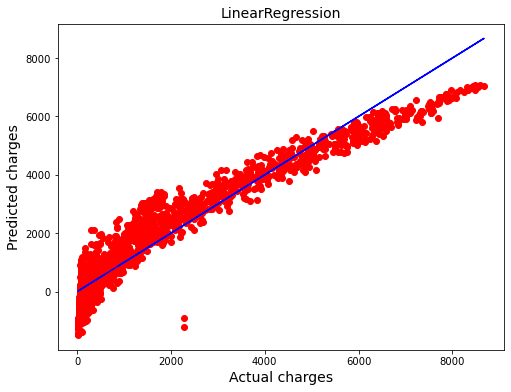

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test, target_test, color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('LinearRegression', fontsize=14)
plt.show()

# Regularization: We are using Lasso Regularization to improve the score

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [104]:
from sklearn.linear_model import Lasso

parameters= {'alpha': [0.0001,0.001,0.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls, parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


alpha value is reponsible for penalizing the values, if we take alpha = 0 this willl be converted into 
ordinary least square fit model which is the simplest form of LinearRegression. Alpha usually have low values.

In [105]:
#final model training
# this alpha values will be given while initiating the lasso regularization 

ls=Lasso(alpha=1, random_state=0)
ls.fit(features_train, target_train)
ls_score_training= ls.score(features_train, target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100


90.42835075238867

In [106]:
lss=r2_score(target_test, pred_ls)
lss*100

90.42026267132482

In [107]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

90.36629382160928

These values are very close with each other, hence, we can approve this model. offcourse we can get the better model than
this,but have to check whether that model is explanable or not. We can use feature selection technique

# Ensemble Technique

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion': ['mse', 'mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf, parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [109]:
    #the values we got from above we have to use here
    rf=RandomForestRegressor(criterion='mae', max_features='auto')
    rf.fit(features_train, target_train)
    rf.score(features_train, target_train)
    pred_decision=rf.predict(features_test)

    rfs= r2_score(target_test,pred_decision)
    print("R2 Score:", rfs*100)

    rfscore=cross_val_score(rf, features, target, cv=5)
    rfc=rfscore.mean()
    print("Cross Val Score", rfc*100)

R2 Score: 99.89362355341729
Cross Val Score 99.8757296835328


R2 Score tells us how well our data fit in the algorithm we are using. R2 score is the better evaluation techinque than
meansquare error

# We are getting model accuracy and cross validation both as 99.8% which shows our model is performing extremely well

In [115]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename, 'wb'))


# conclusion

In [125]:
loaded_model= pickle.load(open('churn.pkl', 'rb'))
result=loaded_model.score(features_test, target_test)
print(result*100)

99.89362355341729


In [126]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:], pred_decision[:]], index=["Predicted", "Original"])

In [127]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
Predicted,857.537,3028.817,1666.1775,1659.319,3650.9495,66.889,966.3225,511.2635,5439.52075,185.1675,...,4188.212,7815.15,2654.914,875.916,572.9015,402.409,3128.20425,70.0955,1265.533,522.7785
Original,857.537,3028.817,1666.1775,1659.319,3650.9495,66.889,966.3225,511.2635,5439.52075,185.1675,...,4188.212,7815.15,2654.914,875.916,572.9015,402.409,3128.20425,70.0955,1265.533,522.7785


Hence, the predicted and orginal values are almost the same